In [7]:
import os
import json
import pandas as pd
from collections import Counter  

from mwc.models import init_db, get_all_movies_with_subtitles, Movie
from mwc.opensubitles import Subtitle
from mwc.helpers import tokenize_textxt
from mwc.cfg import DB_PATH

init_db(DB_PATH)

In [8]:
movies = get_all_movies_with_subtitles()

In [9]:
all_words = []
words_count = []
movies_count = []

for movie in  movies:    
    subtitle = Subtitle.get_from_movie(movie)

    lines = [l.content for l in subtitle.get_lines()]
    words = tokenize_text(' '.join(lines))

    counter = Counter(words.split(' '))
    all_words += list(counter.keys())
    words_count += list(counter.values())
    movies_count += [1] * len(counter)



In [22]:
words_df = pd \
    .DataFrame(data={'word': all_words, 'count': words_count, 'movies_count': movies_count}) \
    .groupby(['word']) \
    .sum()
words_df['presence'] = words_df.movies_count / len(movies)
words_df

,count,movies_count,presence
word,,,
aaa,10,4,0.007018
aaaa,7,2,0.003509
aaaaaaaaahh,1,1,0.001754
aaaaaaah,1,1,0.001754
aaaaaah,2,2,0.003509
...,...,...,...
ﬁrst,4,1,0.001754
ﬁves,1,1,0.001754
ﬂag,1,1,0.001754


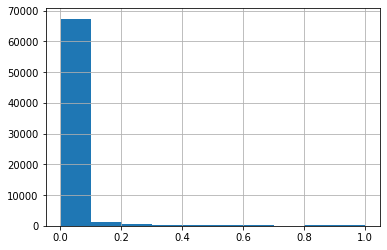

In [11]:
fig = words_df.presence.hist(bins=10)

In [26]:
THRESHOLD = .4
stop_words_df = words_df[words_df.presence > THRESHOLD]
stop_words = list(stop_words_df.index) 
len(stop_words)

735

In [27]:
with open("stop_words.json", "w") as json_file:
    json.dump(stop_words, json_file)